In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True) # parse_dates covert it into year/month/day format

In [55]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [57]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

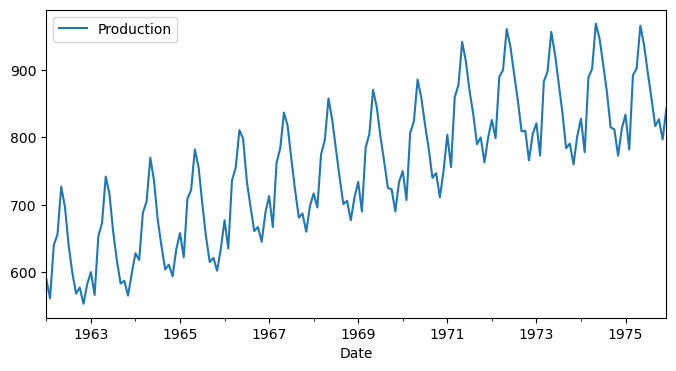

In [58]:
df.plot(figsize=(8,4))

In [59]:
len(df) # 168 months

168

In [60]:
train=df.iloc[:158]
test=df.iloc[158:]

In [61]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [62]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-10-01,812
1974-11-01,773
1974-12-01,813


### Scale Down-Normalise

In [63]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

scaled_train = scalar.fit_transform(train)
scaled_test = scalar.fit_transform(test)

In [64]:
scaled_train[-12:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [65]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [66]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [67]:
n_input=3

generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1) 
# here two  times scales_train in given beacuse in 1st scales_train n_input =3 so it works like it will take 1-3 ([0.56213018],[0.62721893],[1.        ]) data is scaled_train and 2nd scaled_train is 4 ([0.82840237]) that is traget , and again in next it will become 2-4([0.62721893],[1.        ],[0.82840237]) and target is 5 ( [0.58579882]) and so on.

##### scaled_train: This is likely your training data that has been preprocessed or scaled for training purposes.it typically contains time series or sequential data.
##### scaled_train: target data lengthen_input: this parameter specifies the length of the sequences that the genertor will generate for training,n_input likely represents the number of time steps to be as input to predict the next time step.
##### For intsance, if n_input is set to 10,the generator will create sequences of length 10.
##### batch_size=1: no. of batches

In [68]:
x,y = generator[1] # here 1 is to start it from 1st index it self.

print(f'Given the array :{x.flatten()}')
print(f'predict this y :{y}')

Given the array :[0.01923077 0.20913462 0.24759615]
predict this y :[[0.41826923]]


In [69]:
x.shape # 1= batch no. , 3= rows ,1=  column

(1, 3, 1)

In [70]:
# we do the same thing,but now instead for 12 months
n_inputs = 12
n_features = 1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1) 

In [71]:
len(df)

168

In [72]:
from keras.models import Sequential
from keras.layers import Dense,LSTM #( dense layers means Ann)

In [73]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inputs,n_features))) # LSTM=Long short term memory
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### The LSTM is a type of recurrent neural network layer(RNN) designed to process and learn from sequential data

##### The LSTM layer process the input sequence one step at a time maintaining an internal state that capture information from previous time steps.

##### 100 Specifies the number of neurons or units in the LSTM layer. Each unit represents a memory cell that store information across time steps

##### input_shape=(n_inputs,n_features)-Defines the shape of the input data expected by the LSTM layer

##### n_inputs-Specifies the number of time steps in the input sequence.Each time step represent one observation or unit of time in the sequential data

In [83]:
model.fit(generator,epochs=50,batch_size=1)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

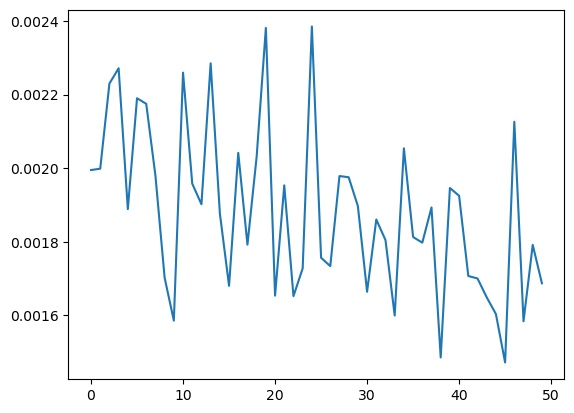

In [84]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [85]:
last_train_batch = scaled_train[-12:]

##### scaled_train[-12:]: This slice operation extracts the last 12 elements from the scaled_train array or list . print(last_train_batch): This prints the extracted batch to verify its contents.

In [86]:
last_train_batch.shape 

(12, 1)

In [87]:
last_train_batch

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [88]:
last_train_batch = last_train_batch.reshape(1,n_inputs,n_features) # 1 is batch size

In [89]:
last_train_batch.shape # 1 is batch no., 12 is row, 1 is columns

(1, 12, 1)

In [90]:
pred=model.predict(last_train_batch) # here we given 1 batch to predict that is why it shows just one value.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [92]:
pred # 13th value

array([[0.8441608]], dtype=float32)